In [14]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
#cargamos los datos de entrada
data = pd.read_csv("./Titanic-Dataset1.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(891, 12)

In [16]:
#Veamos los primeros registros
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Comprobar valores nulos
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
# Rellenar valores nulos
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [20]:
# Convertir variables categóricas
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [21]:
# Eliminar columnas innecesarias
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [22]:
# Verificar que no hay valores nulos
print(data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


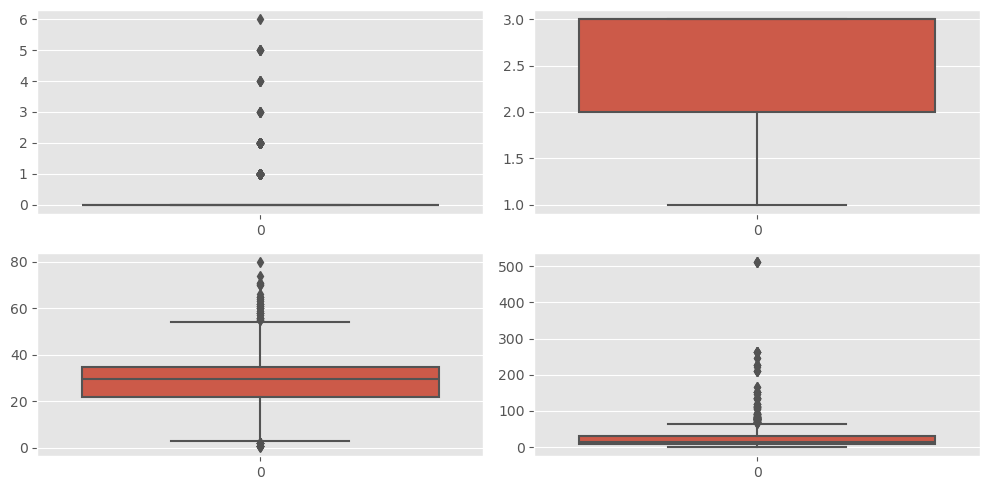

In [23]:
# Análisis de valores atípicos
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(data['Parch'], ax = axs[0,0])
plt2 = sns.boxplot(data['Pclass'], ax = axs[0,1])
plt3 = sns.boxplot(data['Age'], ax = axs[1,0])
plt1 = sns.boxplot(data['Fare'], ax = axs[1,1])

plt.tight_layout()

In [24]:
#Separar las características (X) y el objetivo (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

In [25]:
#Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir predicciones continuas en clases binarias (0 o 1)
y_pred_class = (y_pred >= 0.5).astype(int)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7932960893854749
Confusion Matrix:
[[89 16]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

